In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import os

In [2]:
# function definition

def min_max_scaler(x):
    x = np.asarray(x)
    return (x - x.min()) / (x.max() - x.min() + 1e-7)

def reverse_min_max_scaler(org_x, x):
    org_x = np.asarray(org_x)
    x = np.asarray(x)
    return (x * (org_x.max() - org_x.min() + 1e-7)) + org_x.min()

In [3]:
input_data_column_cnt = 6
output_data_column_cnt = 1

seq_length = 7
hidden_size = 20
stacked_layers_cnt = 1
keep_prob = 1.0

learning_rate = 1e-2
epoch_num = 1500

In [4]:
# data load (feat. pandas)

csv_file_path  = './resources/csv/AMZN.csv'
names = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

stock_df = pd.read_csv(csv_file_path, names=names, header=0, encoding='utf-8')
stock_df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [5]:
# delete Date column

del stock_df['Date']
stock_df

,Open,High,Low,Close,Adj_Close,Volume
0,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [6]:
# type casting

stock_data = stock_df.values[:].astype(np.float32)
print('stock_data.shape: ', stock_data.shape, '\n')
print('=' * 50, '\n')

price = stock_data[:, :-1]
volume = stock_data[:, [-1]]
print('price: \n', price, '\n')
print('price.shape: ', price.shape, '\n')
print('volume: \n', volume, '\n')
print('volume.shape: ', volume.shape)

stock_data.shape:  (5375, 6) 


price: 
 [[2.4375000e+00 2.5000000e+00 1.9270830e+00 1.9583330e+00 1.9583330e+00]
 [1.9687500e+00 1.9791670e+00 1.7083330e+00 1.7291670e+00 1.7291670e+00]
 [1.7604170e+00 1.7708330e+00 1.6250000e+00 1.7083330e+00 1.7083330e+00]
 ...
 [1.9405000e+03 1.9408300e+03 1.9049000e+03 1.9264200e+03 1.9264200e+03]
 [1.9385800e+03 1.9550000e+03 1.9322500e+03 1.9443000e+03 1.9443000e+03]
 [1.9542200e+03 1.9573101e+03 1.9105011e+03 1.9150100e+03 1.9150100e+03]] 

price.shape:  (5375, 5) 

volume: 
 [[72156000.]
 [14700000.]
 [ 6106800.]
 ...
 [ 4056800.]
 [ 3143900.]
 [ 6605883.]] 

volume.shape:  (5375, 1)


In [7]:
# min-max scaling

norm_price = min_max_scaler(price)
norm_volume = min_max_scaler(volume)

print('norm_price: \n', norm_price, '\n')
print('norm_price.shape: ', norm_price.shape, '\n')
print('norm_volume: \n', norm_volume, '\n')
print('norm_volume.shape: ', norm_volume.shape)

norm_price: 
 [[5.4899807e-04 5.7949795e-04 2.9991547e-04 3.1516541e-04 3.1516541e-04]
 [3.2024889e-04 3.2533234e-04 1.9316583e-04 2.0333278e-04 2.0333278e-04]
 [2.1858272e-04 2.2366573e-04 1.5249947e-04 1.9316583e-04 1.9316583e-04]
 ...
 [9.4632018e-01 9.4648123e-01 9.2894745e-01 9.3944919e-01 9.3944919e-01]
 [9.4538319e-01 9.5339614e-01 9.4229418e-01 9.4817460e-01 9.4817460e-01]
 [9.5301551e-01 9.5452344e-01 9.3168080e-01 9.3388110e-01 9.3388110e-01]] 

norm_price.shape:  (5375, 5) 

norm_volume: 
 [[0.6901716 ]
 [0.13686948]
 [0.05411683]
 ...
 [0.0343753 ]
 [0.02558406]
 [0.05892301]] 

norm_volume.shape:  (5375, 1)


In [8]:
# data concatenate

norm_stock_data = np.concatenate((norm_price, norm_volume), axis=1)

print('norm_stock_data: \n', norm_stock_data, '\n')
print('norm_stock_data.shape: ', norm_stock_data.shape)

norm_stock_data: 
 [[5.4899807e-04 5.7949795e-04 2.9991547e-04 3.1516541e-04 3.1516541e-04
  6.9017160e-01]
 [3.2024889e-04 3.2533234e-04 1.9316583e-04 2.0333278e-04 2.0333278e-04
  1.3686948e-01]
 [2.1858272e-04 2.2366573e-04 1.5249947e-04 1.9316583e-04 1.9316583e-04
  5.4116830e-02]
 ...
 [9.4632018e-01 9.4648123e-01 9.2894745e-01 9.3944919e-01 9.3944919e-01
  3.4375302e-02]
 [9.4538319e-01 9.5339614e-01 9.4229418e-01 9.4817460e-01 9.4817460e-01
  2.5584061e-02]
 [9.5301551e-01 9.5452344e-01 9.3168080e-01 9.3388110e-01 9.3388110e-01
  5.8923010e-02]] 

norm_stock_data.shape:  (5375, 6)


In [9]:
# input data processing

x_data = []     # 7일 간의 주식정보
y_data = []     # 다음날의 수정 주가(Adj_Close)

for i in range(len(norm_stock_data) - seq_length):
    x = norm_stock_data[i : i+seq_length]
    y = norm_stock_data[i+seq_length][-2]
    
    x_data.append(x)
    y_data.append(y)

print('x_data[0]: \n', x_data[0], '\n')
print('y_data[0]: ', y_data[0])

x_data[0]: 
 [[5.48998069e-04 5.79497952e-04 2.99915468e-04 3.15165409e-04
  3.15165409e-04 6.90171599e-01]
 [3.20248888e-04 3.25332338e-04 1.93165833e-04 2.03332776e-04
  2.03332776e-04 1.36869475e-01]
 [2.18582718e-04 2.23665731e-04 1.52499473e-04 1.93165833e-04
  1.93165833e-04 5.41168302e-02]
 [2.03332776e-04 2.13499254e-04 1.57582937e-04 1.57582937e-04
  1.57582937e-04 4.79574725e-02]
 [1.57582937e-04 1.62665936e-04 3.04998939e-05 5.59163163e-05
  5.59163163e-05 1.76864848e-01]
 [6.09997878e-05 6.60832593e-05 0.00000000e+00 4.06663676e-05
  4.06663676e-05 1.08719014e-01]
 [4.57498390e-05 1.01666155e-04 1.01664764e-05 9.14996781e-05
  9.14996781e-05 1.48783728e-01]] 

y_data[0]:  0.00013216605


In [10]:
# train, test data dividing

train_size = int(len(norm_stock_data) * 0.7)

train_x_data = np.array(x_data[0 : train_size])
train_y_data = np.array(y_data[0 : train_size])
train_y_data = train_y_data.reshape(-1, 1)

test_x_data = np.array(x_data[train_size : ])
test_y_data = np.array(y_data[train_size : ])
test_y_data = test_y_data.reshape(-1, 1)

print('train_x_data.shape =', train_x_data.shape)
print('train_y_data.shape =', train_y_data.shape)
print('=' * 50)
print('test_x_data.shape =', test_x_data.shape)
print('test_y_data.shape =', test_y_data.shape)

train_x_data.shape = (3762, 7, 6)
train_y_data.shape = (3762, 1)
test_x_data.shape = (1606, 7, 6)
test_y_data.shape = (1606, 1)


In [11]:
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
Y = tf.placeholder(tf.float32, [None, 1])

In [12]:
# LSTM model

def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size)
    
    if not keep_prob == 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob) # dropOut
        
    return cell


cells = [lstm_cell() for _ in range(stacked_layers_cnt)]
if stacked_layers_cnt > 1:
    stacked_cells = tf.contrib.rnn.MultiRNNCell(cells)
else:
    stacked_cells = lstm_cell()
    
hypothesis, _states = tf.nn.dynamic_rnn(stacked_cells, X, dtype=tf.float32)
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt)    # MANY-TO-ONE

In [13]:
cost = tf.reduce_sum(tf.square(hypothesis - Y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [14]:
start_time = time.time()
save_model_path = os.getcwd() + '/resources/models/'

# train model 저장용 디렉터리 생성
if not os.path.isdir(save_model_path):
    os.makedirs(seve_model_path + 'model_0/')
    save_model_path = save_model_path + 'model_0/'
else:
    model_cnt = len(os.listdir(save_model_path))
    os.mkdir(save_model_path + 'model_' + str(model_cnt))
    save_model_path = save_model_path + 'model_' + str(model_cnt) + '/'
    
cost_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    for epoch in range(epoch_num):
        _, c = sess.run([train, cost], feed_dict={X: train_x_data, Y: train_y_data})

        if epoch % 100 == 0 or epoch + 1 == epoch_num:
            print('epoch = {} / {}    cost = {}'.format(epoch, epoch_num, c))

        cost_list.append(c)
    
    saver.save(sess, save_model_path)

end_time = time.time()
elapsed_time = end_time - start_time
print('complete')
print('Elapsed time = ', elapsed_time)

epoch = 0 / 1500    cost = 4.665539264678955
epoch = 100 / 1500    cost = 0.009825274348258972
epoch = 200 / 1500    cost = 0.009462517686188221
epoch = 300 / 1500    cost = 0.00917064119130373
epoch = 400 / 1500    cost = 0.008857345208525658
epoch = 500 / 1500    cost = 0.008526106365025043
epoch = 600 / 1500    cost = 0.008184785954654217
epoch = 700 / 1500    cost = 0.007843926548957825
epoch = 800 / 1500    cost = 0.007519555278122425
epoch = 900 / 1500    cost = 0.007233340293169022
epoch = 1000 / 1500    cost = 0.007004377897828817
epoch = 1100 / 1500    cost = 0.006832738872617483
epoch = 1200 / 1500    cost = 0.006696803029626608
epoch = 1300 / 1500    cost = 0.006574147846549749
epoch = 1400 / 1500    cost = 0.006455115973949432
epoch = 1499 / 1500    cost = 0.00634023267775774
complete
Elapsed time =  59.23483109474182


In [15]:
save_model_path = './resources/models/model_' + str(model_cnt) + '/'

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, save_model_path)
    
    prediction = sess.run(hypothesis, feed_dict={X: test_x_data})

INFO:tensorflow:Restoring parameters from ./resources/models/model_2/


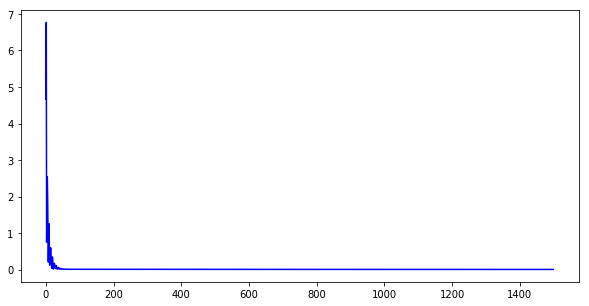

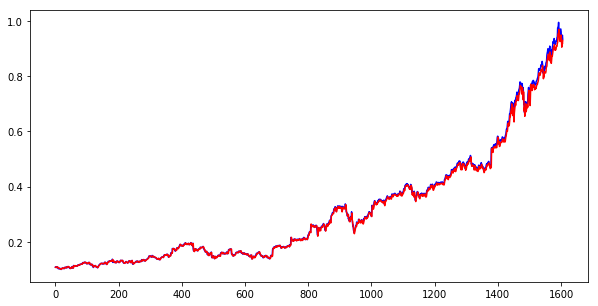

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, [10, 5])
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(cost_list, 'b')
plt.show()

plt.figure(2, [10, 5])
plt.plot(test_y_data, 'b')
plt.plot(prediction, 'r')
plt.show()

In [22]:
# 가장 최근 sequence_length 만큼의 데이터 슬라이싱

# recent_data = np.array(test_x_data[len(test_x_data) - 1 : ])
recent_data = np.array([test_x_data[-2]])
print('recent_data.shape: ', recent_data.shape)
print('recent_data: ', recent_data)

# 저장된 모델 불러와 session run
save_model_path = './resources/models/model_0/'    # 가장 결과가 좋은 모델

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, save_model_path)
    
    recent_prediction = sess.run(hypothesis, feed_dict={X: recent_data})

recent_data.shape:  (1, 7, 6)
recent_data:  [[[0.94035196 0.9699296  0.93485224 0.96908534 0.96908534 0.0437819 ]
  [0.9724281  0.9753561  0.95702684 0.9704761  0.9704761  0.03781514]
  [0.9753561  0.97963095 0.96658677 0.9704127  0.9704127  0.03018336]
  [0.97190595 0.9722573  0.9554555  0.9608088  0.9608088  0.03038077]
  [0.9532644  0.9542843  0.92041236 0.9304749  0.9304749  0.06320179]
  [0.93565744 0.9549577  0.9340909  0.94658864 0.94658864 0.0364159 ]
  [0.9463202  0.9464812  0.92894745 0.9394492  0.9394492  0.0343753 ]]]
INFO:tensorflow:Restoring parameters from ./resources/models/model_0/


In [23]:
# 다음날 수정 주가 예측

print('recent_prediction', recent_prediction[0])
recent_prediction = reverse_min_max_scaler(price, recent_prediction[0])
print("tomorrow's stock price:", recent_prediction)

recent_prediction [0.93586296]
tomorrow's stock price: [1919.0712]
